# 4.Convert the response Variable   to an object data type  and summarise the level of this class attribute
# 5.Summarise the data set and its data types 
# 6.Give a correlation matrix for all the integer columns in the given data set
# 7.Draw a bar plot with: installment rate vs count of observations by response type
# 8.Draw a Box plot fot the age by response variable
# 9.Draw a box plot for the duration by respose variable
# 10. Comment on the observations  for the plots  of continuous variables in Q7,Q8 and Q9
# 11. Draw a bar plot with: chk_acct vs count of observations by response type.Comment on the observations
# 12.  Draw a bar plot with:cdeit_hist vs count of abservations by response types. Comment on the observations
# 13. Draw a bar plot with:savings_acc vs count of observations by response type. Comment on the observations 
# 14 . Comment on the obsrvations for plots  of categorical variables   in Q11 and Q12,
# 15. Spit the entire data set to x and y from the given data set. X will have columns:  sex , housing, saving_acct, chk_acct, age, duration,amount, and y will have the column: response
# 16. From above created x and y: perfom data standaerdization: One hot encoding of the categorical colums(sex,housing,savings account,,checking account) and normalization of numbericall columns(age,duration and amount)
# 17.Diving the data into train, validation adn test sets (80% - 10% -10%)
# 18 Run a logistic regression model  and print the model  score
# 19. Draw a confusion matrix  for the above model
# 20. Comment on the numbers  which appear on the matrix wich is DF, DN & FN 
# 21. Runn a esemble model (Logistic Regression, svc and Random forest). Perfom a K-FOLD (10 fold cross validation techniques)
# 22. Compute the accouracy , recall,precision and ROC-AUC scores for the models

In [87]:
#Load the librarys
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn
import plotly.express as px
from IPython.display import display, Markdown, Latex

sns.set_style('whitegrid')


# Remove warnings
import warnings
warnings.filterwarnings('ignore')

#Importing the data
grm = pd.read_csv(r"C:\Users\monga\Desktop\Fintech DS\german.csv")

In [88]:
#Getting a view of the  1st 5 columns of our DataSet
grm.head()

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21
0,1,A11,6,A34,A43,1169,A65,A75,4,A93,...,A121,67,A143,A152,2,A173,good,A192,A201,1
1,2,A12,48,A32,A43,5951,A61,A73,2,A92,...,A121,22,A143,A152,1,A173,good,A191,A201,2
2,3,A14,12,A34,A46,2096,A61,A74,2,A93,...,A121,49,A143,A152,1,A172,bad,A191,A201,1
3,4,A11,42,A32,A42,7882,A61,A74,2,A93,...,A122,45,A143,A153,1,A173,bad,A191,A201,1
4,5,A11,24,A33,A40,4870,A61,A73,3,A93,...,A124,53,A143,A153,2,A173,bad,A191,A201,2


In [89]:
# Dropping the Unnamed: 0 Collumn as it has no revervance to the data set.
grm.drop(['Unnamed: 0'],axis=1, inplace=True)

In [90]:
grm.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,good,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,good,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,bad,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,bad,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,bad,A191,A201,2


## Renaming the 21 Columns for Data Analysis

In [91]:
#Print Columnns Before renaming the columns
print(grm.columns)
  
grm.columns = ['Chk_acct' , 'duration', 'credit_his','purpose', 'amount', 'saving_acct', 'present_emp', 'installment_rate','sex', 'other_debtor','present_resid','property', 'age', 'other_install', 'housing', 'n_credits','job','n_people','telephone','foreign','response']
  
#Print After renaming the columns
print(grm.columns)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21'],
      dtype='object')
Index(['Chk_acct', 'duration', 'credit_his', 'purpose', 'amount',
       'saving_acct', 'present_emp', 'installment_rate', 'sex', 'other_debtor',
       'present_resid', 'property', 'age', 'other_install', 'housing',
       'n_credits', 'job', 'n_people', 'telephone', 'foreign', 'response'],
      dtype='object')


In [92]:
grm.head()

,Chk_acct,duration,credit_his,purpose,amount,saving_acct,present_emp,installment_rate,sex,other_debtor,...,property,age,other_install,housing,n_credits,job,n_people,telephone,foreign,response
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,good,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,good,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,bad,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,bad,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,bad,A191,A201,2


In [93]:
def show_info(data):
    print('DATASET SHAPE: ', data.shape, '\n')
    print('-'*50)
    print('FETURE DATA TYPES:')
    print(data.info())
    print('\n', '-'*50)
    print('NUMBER OF UNIQUE VALUES PER FEATURE:', '\n')
    print(data.nunique())
    print('\n', '-'*50)
    print('NULL VALUES PER FEATURE')
    print(data.isnull().sum())

In [94]:
show_info(grm)

DATASET SHAPE:  (1000, 21) 

--------------------------------------------------
FETURE DATA TYPES:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Chk_acct          1000 non-null   object
 1   duration          1000 non-null   int64 
 2   credit_his        1000 non-null   object
 3   purpose           1000 non-null   object
 4   amount            1000 non-null   int64 
 5   saving_acct       1000 non-null   object
 6   present_emp       1000 non-null   object
 7   installment_rate  1000 non-null   int64 
 8   sex               1000 non-null   object
 9   other_debtor      1000 non-null   object
 10  present_resid     1000 non-null   int64 
 11  property          1000 non-null   object
 12  age               1000 non-null   int64 
 13  other_install     1000 non-null   object
 14  housing           1000 non-null   object
 15  n_credit

In [95]:
# Vizualizing to see if there are any null values
#sns.heatmap(grm.isnull(),yticklabels=False,annot=True)

### Changing the response variable from 1 and 2 to 0 and 1 ie binary numbers

In [96]:
grm['response']  = grm['response'] -1

In [97]:
grm.head()

,Chk_acct,duration,credit_his,purpose,amount,saving_acct,present_emp,installment_rate,sex,other_debtor,...,property,age,other_install,housing,n_credits,job,n_people,telephone,foreign,response
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,good,A192,A201,0
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,good,A191,A201,1
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,bad,A191,A201,0
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,bad,A191,A201,0
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,bad,A191,A201,1


In [98]:
grm.response.value_counts()

0    700
1    300
Name: response, dtype: int64

In [99]:
print(grm.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Chk_acct          1000 non-null   object
 1   duration          1000 non-null   int64 
 2   credit_his        1000 non-null   object
 3   purpose           1000 non-null   object
 4   amount            1000 non-null   int64 
 5   saving_acct       1000 non-null   object
 6   present_emp       1000 non-null   object
 7   installment_rate  1000 non-null   int64 
 8   sex               1000 non-null   object
 9   other_debtor      1000 non-null   object
 10  present_resid     1000 non-null   int64 
 11  property          1000 non-null   object
 12  age               1000 non-null   int64 
 13  other_install     1000 non-null   object
 14  housing           1000 non-null   object
 15  n_credits         1000 non-null   int64 
 16  job               1000 non-null   object
 17  n_people       

## 6.Give a correlation matrix for all the integer columns in the given data set

In [100]:
# A quick way to separate numeric  and categorical values separately
grm.describe().columns

Index(['duration', 'amount', 'installment_rate', 'present_resid', 'age',
       'n_credits', 'response'],
      dtype='object')

In [101]:
#Finding numerical and categorical data column names
num = [ i for i in grm.columns if grm.dtypes[i]!='object' ] # histograms
cat = [ i for i in grm.columns if grm.dtypes[i]=='object' ] # value counts

In [102]:
#categorigal data 
num

['duration',
 'amount',
 'installment_rate',
 'present_resid',
 'age',
 'n_credits',
 'response']

### Numerical variables correlation with the response variable

<AxesSubplot:>

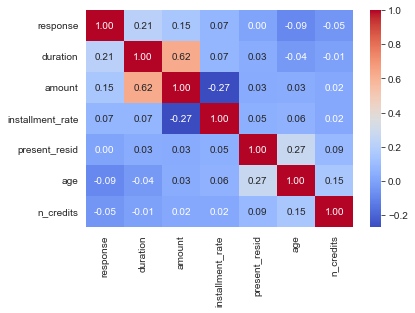

In [103]:
sns.heatmap(grm[['response','duration', 'amount', 'installment_rate', 'present_resid', 'age', 'n_credits']].corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')

from the above summary, we see a strong coorelation between the duration and amount variable

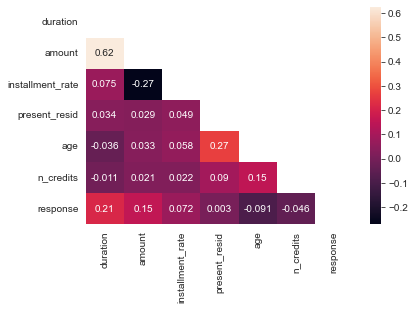

In [104]:
# Masking to show only one side of the matrix
corr = np.corrcoef(grm.corr())                        
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Axtual Correlation matrix as a heatmap
sns.heatmap(grm.corr(), annot=True, mask=mask)
plt.show()

Duration has a strong correlation with ammount

# 4.Convert the response Variable   to an object data type  and summarise the level of this class attribute

In [105]:
# Converting the int data type into an obj data type
#grm['response'] =  grm['response'].astype(str)

In [106]:
# Check and print type conv_num variable
print(grm.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Chk_acct          1000 non-null   object
 1   duration          1000 non-null   int64 
 2   credit_his        1000 non-null   object
 3   purpose           1000 non-null   object
 4   amount            1000 non-null   int64 
 5   saving_acct       1000 non-null   object
 6   present_emp       1000 non-null   object
 7   installment_rate  1000 non-null   int64 
 8   sex               1000 non-null   object
 9   other_debtor      1000 non-null   object
 10  present_resid     1000 non-null   int64 
 11  property          1000 non-null   object
 12  age               1000 non-null   int64 
 13  other_install     1000 non-null   object
 14  housing           1000 non-null   object
 15  n_credits         1000 non-null   int64 
 16  job               1000 non-null   object
 17  n_people       

 From the above you can see in row number 20  which is the respose variable has been converted to a response variable

 ## 5.Summarise the data set and its data types 

In [107]:
# Summary statistics for the data set 
grm.describe()

,duration,amount,installment_rate,present_resid,age,n_credits,response
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,0.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,0.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,0.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,0.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,1.000000


In [108]:
display(Markdown("#### Explore the Values of Text Columns:"))
cols = ['sex', 'housing', 'saving_acct', 'Chk_acct', 'purpose', 'response']
for col in cols:
    line = "**" + col + ":** "
    for v in grm[col].unique():
        line = line + str(v) + ", "
    display(Markdown(line))

#### Explore the Values of Text Columns:

**sex:** A93, A92, A91, A94, 

**housing:** A152, A153, A151, 

**saving_acct:** A65, A61, A63, A64, A62, 

**Chk_acct:** A11, A12, A14, A13, 

**purpose:** A43, A46, A42, A40, A41, A49, A44, A45, A410, A48, 

**response:** 0, 1, 

## Explore the Values of Text Columns in relation to other german data sets to better undending and analysis of the data

- Sex: 
Still remains to be categorised into 4 parts. But our human undestating is 2 male and female
:ie A93, A92, A91, A94,

- Housing: 
own  -  A152 
free -  A153
rent - A151

- Saving accounts: 
nan, 
little, 
quite rich, 
rich, moderate,

- Checking account: 
little, moderate, nan, rich,

- Purpose:
radio/TV, education, furniture/equipment, car, business, domestic appliances, repairs, vacation/others,

- Risk: 
good, bad,




From above exploration:

Columns "Housing", "Saving accounts" and "Checking accounts" are Ordinal data.

Columns "Sex", "Purpose" and "Risk" are Categorical data.


# Visualize the Response Variable

<AxesSubplot:xlabel='response', ylabel='count'>

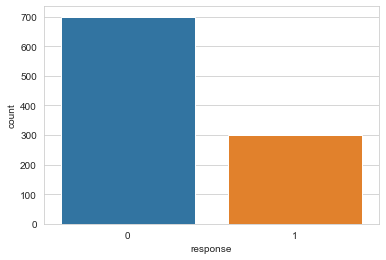

In [109]:
#Visualize the Response Variable 0 for good and 1 for bad
sns.countplot(grm['response'])

# 7.Draw a bar plot with: installment rate vs count of observations by response type

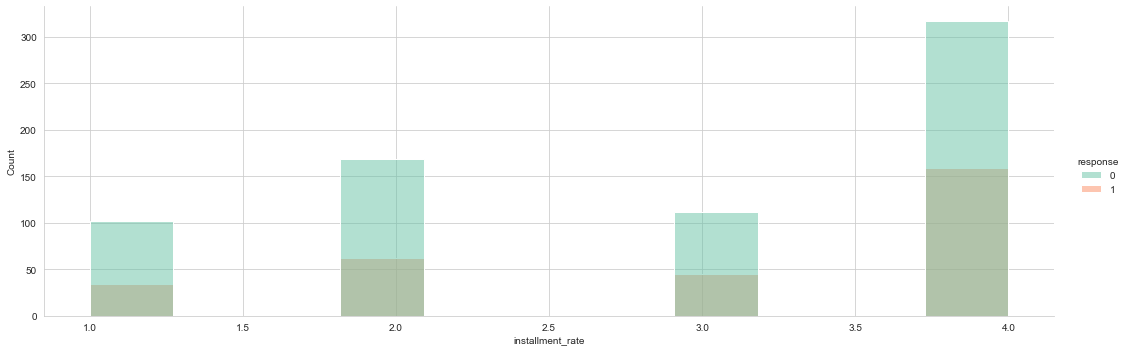

In [110]:
# Age distribution sex-wise
sns.displot(data=grm,x='installment_rate',hue='response',kde=False,palette='Set2',aspect=3);

from the above, group 4 of the installemt rate is the highest in relation to the response variable

# Multi-Variate Analysis:

Multivariate analysis is used when we want to compare more than two categories. Usually, a boxplot is a good representation as shown here.

# 8.Draw a Box plot fot the age by response variable

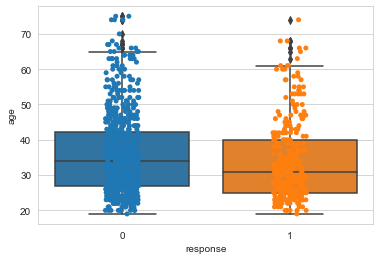

In [111]:
# Boxplot with Seaborn
sns.set_style('whitegrid')
ax= sns.boxplot(x='response',y='age',data=grm)
ax = sns.stripplot(x="response", y="age",data=grm)

from the above ovesevations, most of your customers are between 20 to 35 year of age

# 9.Draw a box plot for the duration by respose variable

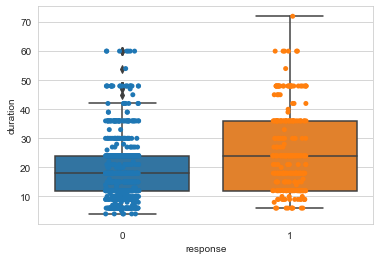

In [112]:
# Boxplot with Seaborn
sns.set_style('whitegrid')
ax= sns.boxplot(x='response',y='duration',data=grm)
ax = sns.stripplot(x="response", y="duration",data=grm)

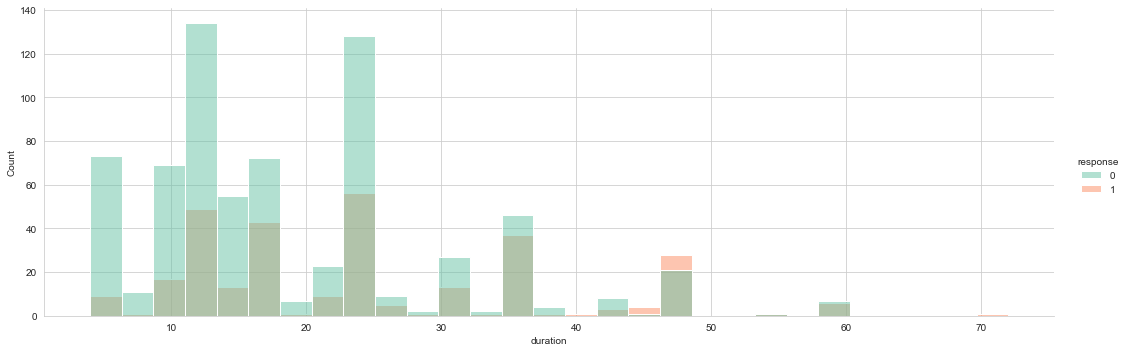

In [113]:
# Duration distribution with the response variable
sns.displot(data=grm,x='duration',hue='response',kde=False,palette='Set2',aspect=3);

# 11. Draw a bar plot with: chk_acct vs count of observations by response type.Comment on the observations

In [114]:
print(grm.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Chk_acct          1000 non-null   object
 1   duration          1000 non-null   int64 
 2   credit_his        1000 non-null   object
 3   purpose           1000 non-null   object
 4   amount            1000 non-null   int64 
 5   saving_acct       1000 non-null   object
 6   present_emp       1000 non-null   object
 7   installment_rate  1000 non-null   int64 
 8   sex               1000 non-null   object
 9   other_debtor      1000 non-null   object
 10  present_resid     1000 non-null   int64 
 11  property          1000 non-null   object
 12  age               1000 non-null   int64 
 13  other_install     1000 non-null   object
 14  housing           1000 non-null   object
 15  n_credits         1000 non-null   int64 
 16  job               1000 non-null   object
 17  n_people       

Text(0.5, 1.0, 'chk_acct vs count of observations by response type')

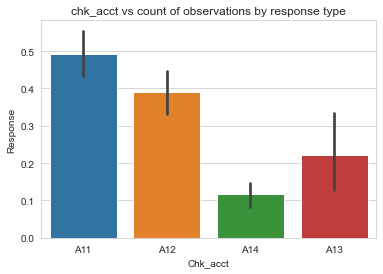

In [115]:
sns.barplot(x = 'Chk_acct', y ='response', data = grm)
plt.ylabel('Response')
plt.title('chk_acct vs count of observations by response type')

# 12.  Draw a bar plot with:cdeit_hist vs count of abservations by response types. Comment on the observations

Text(0.5, 1.0, 'Credit history vs count of observations by response type')

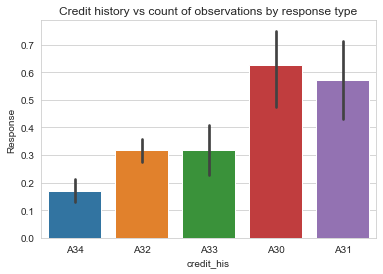

In [116]:
sns.barplot(x = 'credit_his', y ='response', data = grm)
plt.ylabel('Response')
plt.title('Credit history vs count of observations by response type')

# 13. Draw a bar plot with:savings_acc vs count of observations by response type. Comment on the observations

Text(0.5, 1.0, 'saving_acct vs count of observations by response type')

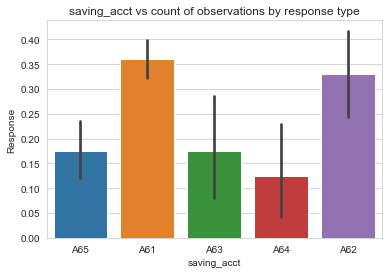

In [117]:
sns.barplot(x = 'saving_acct', y ='response', data = grm)
plt.ylabel('Response')
plt.title('saving_acct vs count of observations by response type')

# Plotting histograms for the Amount and Saving account Variables

In [118]:
fig = px.histogram(grm,x='amount',color='saving_acct',template='plotly_dark',marginal='box',color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(barmode='group')

In [119]:
fig = px.histogram(grm,x='amount',color='Chk_acct',template='plotly_dark',marginal='box',color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(barmode='group')

# HOUSING  VS Saving account

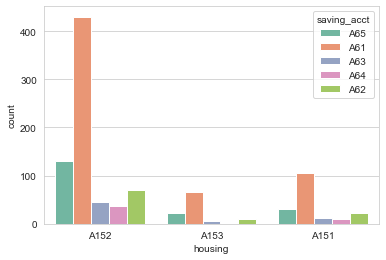

In [120]:
# Housing vs Saving account
sns.countplot(x='housing',data=grm,hue='saving_acct',palette='Set2');

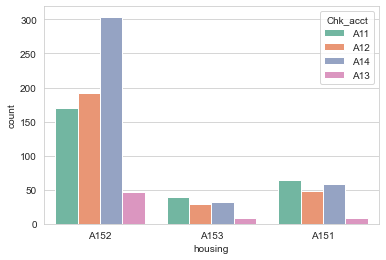

In [121]:
# Housing vs Checking account
sns.countplot(x='housing',data=grm,hue='Chk_acct',palette='Set2');

In [122]:
# sex vs credit amount 
#px.histogram(grm,x='sex',y='amount',color_discrete_sequence=px.colors.sequential.Sunset,template='plotly_dark')

# Job Variable

In [123]:
grm['job'].mode()[0]
# most people are engaged in 2 jobs

'A173'

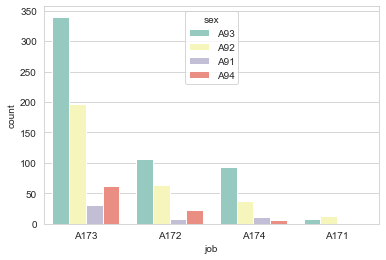

In [124]:
# Job 
sns.countplot(data=grm,x='job',hue='sex',palette='Set3');

In [125]:
#fig = px.histogram(grm,x='job',y='amount',color_discrete_sequence=px.colors.sequential.Sunset,template='plotly_dark')
#fig.update_layout(bargap=0.2)

# Purpose

In [126]:
grm['purpose'].value_counts()

A43     280
A40     234
A42     181
A41     103
A49      97
A46      50
A45      22
A44      12
A410     12
A48       9
Name: purpose, dtype: int64

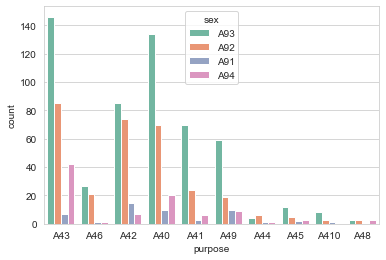

In [127]:
sns.countplot(data=grm,x='purpose',hue='sex',palette='Set2');

# Duration

In [128]:
# longest duration for credit amount
grm[['duration','sex','age','housing','job']].sort_values(by='duration',ascending=False).head(20).style.background_gradient(axis=0)

,duration,sex,age,housing,job
677,72,A94,24,A152,A173
973,60,A93,36,A151,A173
685,60,A93,34,A153,A173
672,60,A93,42,A152,A174
714,60,A93,27,A152,A174
637,60,A93,21,A152,A173
616,60,A93,27,A153,A174
134,60,A92,21,A152,A173
255,60,A93,27,A152,A172
373,60,A93,63,A153,A174


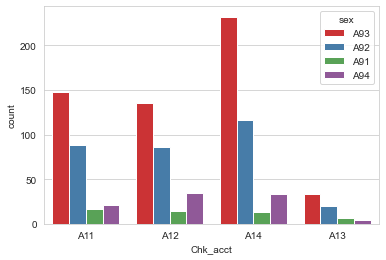

In [129]:
sns.countplot(data=grm,x='Chk_acct',hue='sex',palette='Set1');

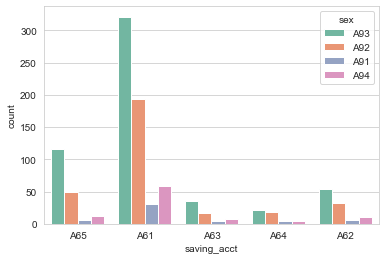

In [130]:
sns.countplot(data=grm,x='saving_acct',hue='sex',palette='Set2');

In [131]:
fig = px.histogram(grm,x='job',y='amount',color='sex',color_discrete_sequence=px.colors.sequential.Sunset,template='plotly_dark')
fig.update_layout(bargap=0.2,barmode='group')

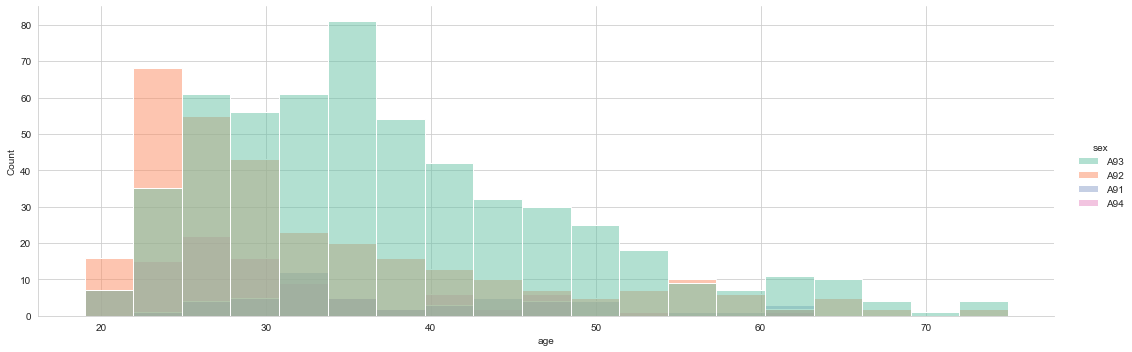

In [132]:
# Age distribution sex-wise
sns.displot(data=grm,x='age',hue='sex',kde=False,palette='Set2',aspect=3);

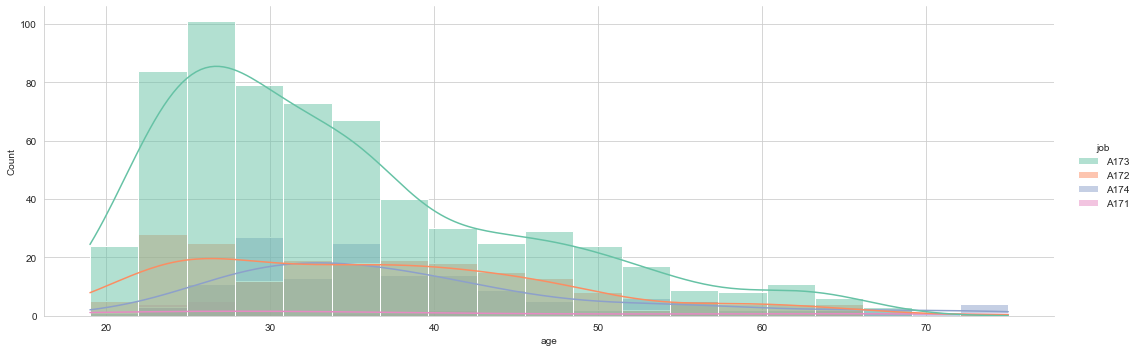

In [133]:
# Age distribution while having different jobs
sns.displot(data=grm,x='age',hue='job',kde=True,palette='Set2',aspect=3);

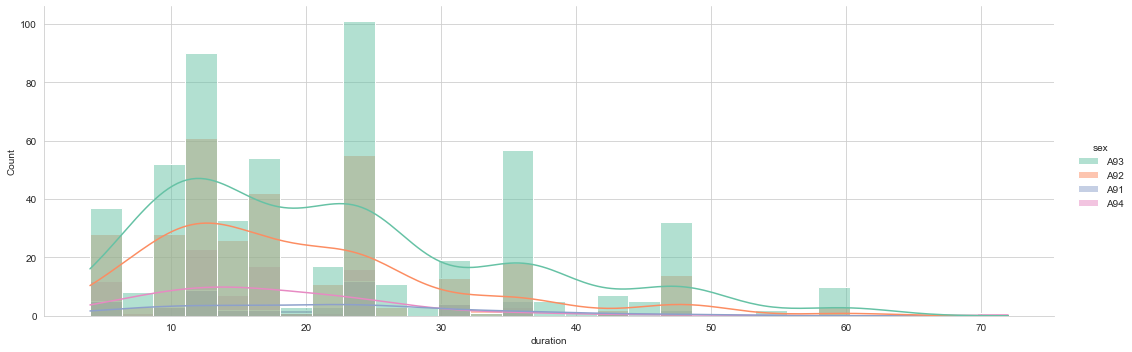

In [134]:
# Duration by Sex
sns.displot(data=grm,x='duration',hue='sex',kde=True,palette='Set2',aspect=3);

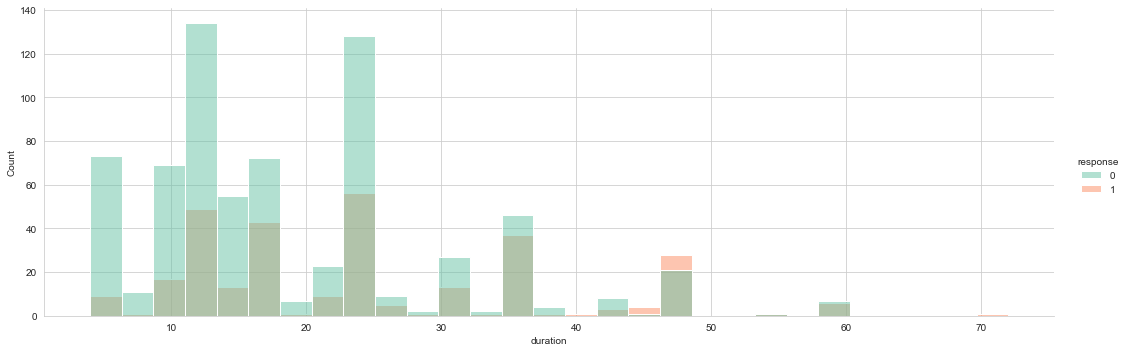

In [135]:
# Duration distribution with the response variable
sns.displot(data=grm,x='duration',hue='response',kde=False,palette='Set2',aspect=3);

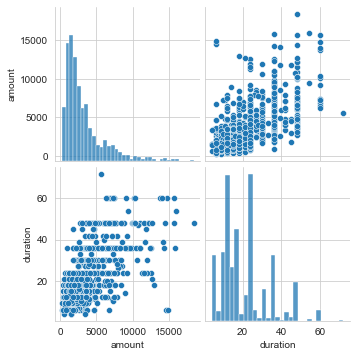

In [136]:
# relation btw Credit amount and Duration
sns.pairplot(data = grm[['amount','duration']]);

In [137]:
display(Markdown("#### Explore the Values of Text Columns:"))
cols = ['sex', 'housing', 'saving_acct', 'Chk_acct', 'purpose', 'response']
for col in cols:
    line = "**" + col + ":** "
    for v in grm[col].unique():
        line = line + str(v) + ", "
    display(Markdown(line))

#### Explore the Values of Text Columns:

**sex:** A93, A92, A91, A94, 

**housing:** A152, A153, A151, 

**saving_acct:** A65, A61, A63, A64, A62, 

**Chk_acct:** A11, A12, A14, A13, 

**purpose:** A43, A46, A42, A40, A41, A49, A44, A45, A410, A48, 

**response:** 0, 1, 

Explore the Values of Text Columns:
Sex: male, female,

Housing: own, free, rent,

Saving accounts: nan, little, quite rich, rich, moderate,

Checking account: little, moderate, nan, rich,

Purpose: radio/TV, education, furniture/equipment, car, business, domestic appliances, repairs, vacation/others,

Risk: good, bad,




### From above exploration:

Columns "Housing", "Saving accounts" and "Checking accounts" are Ordinal data.

Columns "Sex", "Purpose" and "Risk" are Categorical data.

In [138]:
# 15. Spit the entire data set to x and y from the given data set. X will have columns:  sex , housing, saving_acct, chk_acct, age, duration,amount, and y will have the column: response
# 16. From above created x and y: perfom data standaerdization: One hot encoding of the categorical colums(sex,housing,savings account,,checking account) and normalization of numbericall columns(age,duration and amount)
# 17.Diving the data into train, validation adn test sets (80% - 10% -10%)
# 18 Run a logistic regression model  and print the model  score
# 19. Draw a confusion matrix  for the above model
# 20. Comment on the numbers  which appear on the matrix wich is DF, DN & FN 
# 21. Runn a esemble model (Logistic Regression, svc and Random forest). Perfom a K-FOLD (10 fold cross validation techniques)
# 22. Compute the accouracy , recall,precision and ROC-AUC scores for the models

# Feature engenreering

### StandardScaler

In [139]:
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, roc_auc_score, auc, accuracy_score
from sklearn.model_selection import ShuffleSplit,train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize, StandardScaler, MinMaxScaler
from sklearn.datasets import make_classification 

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from pprint import pprint 

In [140]:
grm.head()

,Chk_acct,duration,credit_his,purpose,amount,saving_acct,present_emp,installment_rate,sex,other_debtor,...,property,age,other_install,housing,n_credits,job,n_people,telephone,foreign,response
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,good,A192,A201,0
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,good,A191,A201,1
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,bad,A191,A201,0
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,bad,A191,A201,0
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,bad,A191,A201,1


In [141]:
#numerical variables labels
numvars = ['amount', 'duration', 'installment_rate', 'age', 
           'n_credits', 'response']

# Standardization
numdata_std = pd.DataFrame(StandardScaler().fit_transform(grm[numvars].drop(['response'], axis=1)))

## Encoding Categorical Feature
Labelencoding to transform categorical to numerical, Enables better Visualization than one hot encoding

In [142]:
from collections import defaultdict

#categorical variables labels
catvars = ['Chk_acct', 'credit_his', 'purpose', 'saving_acct', 'present_emp',
           'sex', 'other_debtor', 'property', 'other_install', 'housing', 'job', 
           'telephone', 'foreign']

d = defaultdict(LabelEncoder)

# Encoding the variable
lecatdata = grm[catvars].apply(lambda x: d[x.name].fit_transform(x))

# print transformations
for x in range(len(catvars)):
    print(catvars[x],": ", grm[catvars[x]].unique())
    print(catvars[x],": ", lecatdata[catvars[x]].unique())

#One hot encoding, create dummy variables for every category of every categorical variable
dummyvars = pd.get_dummies(grm[catvars])

Chk_acct :  ['A11' 'A12' 'A14' 'A13']
Chk_acct :  [0 1 3 2]
credit_his :  ['A34' 'A32' 'A33' 'A30' 'A31']
credit_his :  [4 2 3 0 1]
purpose :  ['A43' 'A46' 'A42' 'A40' 'A41' 'A49' 'A44' 'A45' 'A410' 'A48']
purpose :  [4 7 3 0 1 9 5 6 2 8]
saving_acct :  ['A65' 'A61' 'A63' 'A64' 'A62']
saving_acct :  [4 0 2 3 1]
present_emp :  ['A75' 'A73' 'A74' 'A71' 'A72']
present_emp :  [4 2 3 0 1]
sex :  ['A93' 'A92' 'A91' 'A94']
sex :  [2 1 0 3]
other_debtor :  ['A101' 'A103' 'A102']
other_debtor :  [0 2 1]
property :  ['A121' 'A122' 'A124' 'A123']
property :  [0 1 3 2]
other_install :  ['A143' 'A141' 'A142']
other_install :  [2 0 1]
housing :  ['A152' 'A153' 'A151']
housing :  [1 2 0]
job :  ['A173' 'A172' 'A174' 'A171']
job :  [2 1 3 0]
telephone :  ['A192' 'A191']
telephone :  [1 0]
foreign :  ['A201' 'A202']
foreign :  [0 1]


# Concancate Transformed Dataset
append the dummy variable of the initial numerical variables numvars# append

In [143]:
clean = pd.concat([grm[numvars], dummyvars], axis = 1)

print(clean.shape)

(1000, 60)


In [144]:
clean.head()

,amount,duration,installment_rate,age,n_credits,response,Chk_acct_A11,Chk_acct_A12,Chk_acct_A13,Chk_acct_A14,...,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreign_A201,foreign_A202
0,1169,6,4,67,2,0,1,0,0,0,...,1,0,0,0,1,0,0,1,1,0
1,5951,48,2,22,1,1,0,1,0,0,...,1,0,0,0,1,0,1,0,1,0
2,2096,12,2,49,1,0,0,0,0,1,...,1,0,0,1,0,0,1,0,1,0
3,7882,42,2,45,1,0,1,0,0,0,...,0,1,0,0,1,0,1,0,1,0
4,4870,24,3,53,2,1,1,0,0,0,...,0,1,0,0,1,0,1,0,1,0


In [145]:
categorical_features = ['sex', 'job', 'housing', 'saving_acct', 'Chk_acct', 'purpose', 'response']

In [146]:
#labelencode the categorical features
for i, cat in enumerate(categorical_features):
    grm[cat] = LabelEncoder().fit_transform(grm[cat])

In [147]:
grm.head()

,Chk_acct,duration,credit_his,purpose,amount,saving_acct,present_emp,installment_rate,sex,other_debtor,...,property,age,other_install,housing,n_credits,job,n_people,telephone,foreign,response
0,0,6,A34,4,1169,4,A75,4,2,A101,...,A121,67,A143,1,2,2,good,A192,A201,0
1,1,48,A32,4,5951,0,A73,2,1,A101,...,A121,22,A143,1,1,2,good,A191,A201,1
2,3,12,A34,7,2096,0,A74,2,2,A101,...,A121,49,A143,1,1,1,bad,A191,A201,0
3,0,42,A32,3,7882,0,A74,2,2,A103,...,A122,45,A143,2,1,2,bad,A191,A201,0
4,0,24,A33,0,4870,0,A73,3,2,A101,...,A124,53,A143,2,2,2,bad,A191,A201,1


# NORMALIZE THE NUMERIC FEATURES
APPLYING LOG TRANSFORMATION

In [148]:
num_df = clean[['age', 'duration', 'amount']]
num_df = np.log(num_df)

<AxesSubplot:xlabel='age', ylabel='Density'>

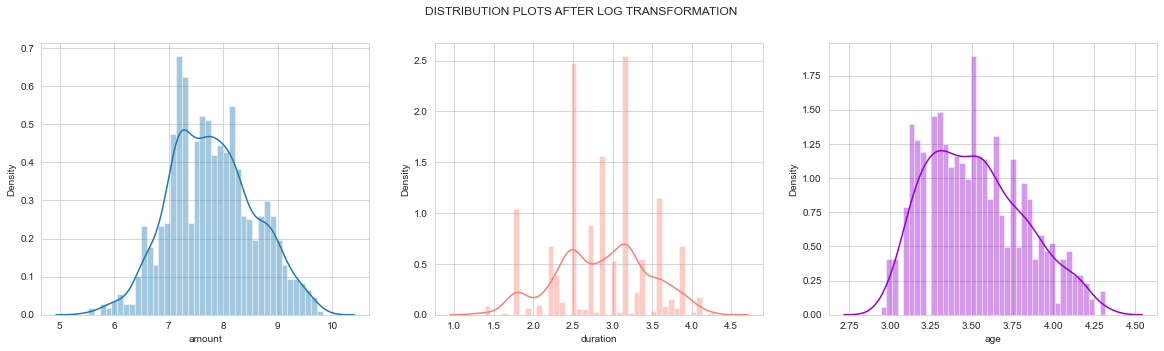

In [149]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
plt.suptitle('DISTRIBUTION PLOTS AFTER LOG TRANSFORMATION')
sns.distplot(num_df['amount'], bins=40, ax=ax[0]);
sns.distplot(num_df['duration'], bins=40, ax=ax[1], color='salmon');
sns.distplot(num_df['age'], bins=40, ax=ax[2], color='darkviolet')

# STANDARDSCALING

In [150]:
scaler = StandardScaler()
num_df_scaled = scaler.fit_transform(num_df)

In [151]:
#show new values
print(num_df_scaled.shape)
num_df_scaled

(1000, 3)


array([[ 2.27100592, -1.86486906, -0.933901  ],
       [-1.44615223,  1.7083687 ,  1.16304581],
       [ 1.22669602, -0.67378981, -0.1815588 ],
       ...,
       [ 0.37810951, -0.67378981, -1.4161991 ],
       [-1.29778048,  1.59746802, -0.34591111],
       [-0.76258638,  1.59746802,  0.82450846]])

# CLUSTERING

K-MEANS

APPLYING ELBOW METHOD TO FIND THE BEST NUMBER OF CLUSTERS

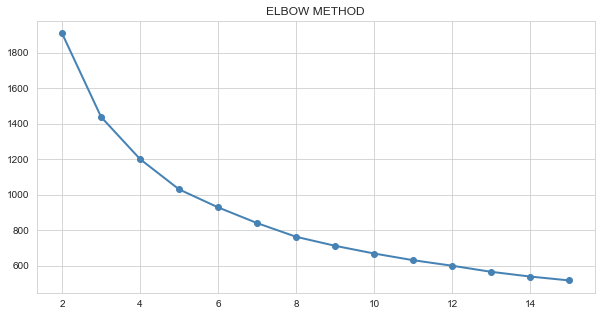

In [152]:
from sklearn.cluster import KMeans
inertias = []

for i in range(2,16):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(num_df_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.title('ELBOW METHOD')
plt.plot(np.arange(2,16),inertias, marker='o', lw=2, color='steelblue');

# ALTERNATIVE METHOD: SILHOUTE SCORE WITH RANDOM SAMPLING


In [153]:
#metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import silhouette_samples, silhouette_score

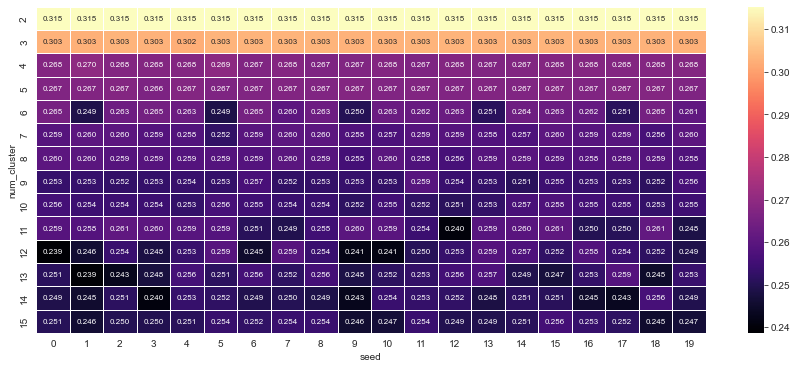

In [154]:
results = []

for i in range(2,16):
    for r in range(20):
        kmeans = KMeans(n_clusters=i, random_state=r)
        c_labels = kmeans.fit_predict(num_df_scaled)
        sil_ave = silhouette_score(num_df_scaled, c_labels)
        results.append([i, r, sil_ave])
        
res_df = pd.DataFrame(results, columns=['num_cluster', 'seed', 'sil_score'])
pivot_kmeans = pd.pivot_table(res_df, index='num_cluster', columns='seed', values='sil_score')

plt.figure(figsize=(15,6))
plt.tight_layout
sns.heatmap(pivot_kmeans, annot=True, linewidths=0.5, fmt='.3f', cmap='magma', annot_kws={"size":8});

- The scores of 2,3,4 and 5 are pretty stable, Let's pick a number of cluster from that range

AT 3 NUMBER OF CLUSTERS

In [155]:
km = KMeans(n_clusters=3, random_state=0)
clusters = km.fit_predict(num_df_scaled)

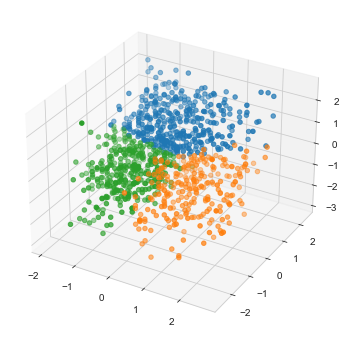

In [156]:
#show a 3D plot of clusters
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

for i in range(3):
    ax.scatter(num_df_scaled[clusters ==i,0], num_df_scaled[clusters ==i,1], num_df_scaled[clusters ==i,2])

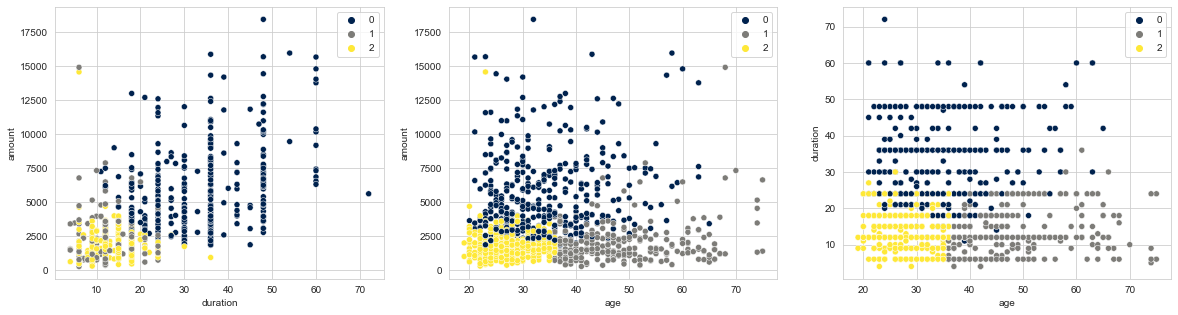

In [157]:
fig, ax  = plt.subplots(1,3,figsize=(20,5))
sns.scatterplot(grm['duration'], grm['amount'], hue=clusters, ax=ax[0], palette='cividis');
sns.scatterplot(grm['age'], grm['amount'], hue=clusters, ax=ax[1], palette='cividis');
sns.scatterplot(grm['age'], grm['duration'], hue=clusters, ax=ax[2], palette='cividis');

# LET'S CREATE A DATAFRAME TO SUMMARIZE THE RESULT

In [158]:
df_clustered = grm[['age', 'duration', 'amount']]
df_clustered['cluster'] = clusters

In [159]:
df_clustered.groupby('cluster').mean()

,age,duration,amount
cluster,,,
0,34.042667,32.224000,5665.384000
1,48.593870,13.862069,1970.498084
2,27.739011,14.288462,1737.469780


- Cluster 0 are the older customers.
- Cluster 1 are the middle-Aged customers.
- Cluster 2 are the younger customers.

# PREDICTIVE MODELLING

In [160]:
num_df_scaled = pd.DataFrame(num_df_scaled, columns=['Age', 'Duration', 'Credit Amount'])
cat_df = grm[categorical_features]

data = pd.concat([cat_df, num_df_scaled], axis=1)

In [161]:
#show new dataframe
data.head(12)

,sex,job,housing,saving_acct,Chk_acct,purpose,response,Age,Duration,Credit Amount
0,2,2,1,4,0,4,0,2.271006,-1.864869,-0.933901
1,1,2,1,0,1,4,1,-1.446152,1.708369,1.163046
2,2,1,1,0,3,7,0,1.226696,-0.673790,-0.181559
3,2,2,2,0,0,3,0,0.942455,1.478913,1.525148
4,2,2,2,0,0,0,1,1.488620,0.517289,0.904743
5,2,1,2,4,3,7,0,0.103614,1.214026,1.703911
6,2,2,1,2,3,3,0,1.488620,0.517289,0.207588
7,2,3,0,0,1,1,0,0.103614,1.214026,1.362630
8,0,1,1,3,3,4,0,1.957856,-0.673790,0.305575
9,3,3,1,0,1,0,1,-0.641198,0.900731,0.997621


In [162]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

In [163]:
import sys
!{sys.executable} -m pip install xgboost

In [164]:
X = data.drop(['response'], axis=1).values
y = data['response'].values

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

# Logistic Regression

In [165]:
log = LogisticRegression()
log.fit(X_train, y_train)
y_pred_log = log.predict(X_test)
print(accuracy_score(y_pred_log, y_test))
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

0.76
[[127  14]
 [ 34  25]]
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       141
           1       0.64      0.42      0.51        59

    accuracy                           0.76       200
   macro avg       0.71      0.66      0.68       200
weighted avg       0.75      0.76      0.74       200



#  K-Nearest Neighbors

In [166]:
"""knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid={'n_neighbors':range(1,20)}, scoring='recall')
grid.fit(X_train, y_train)

grid.best_params_

for i in range(0, len(grid.cv_results_['mean_test_score'])):
    print('N_Neighbors {}: {} '.format(i+1, grid.cv_results_['mean_test_score'][i]*100))"""
    
# recall peaks at k = 1

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print(accuracy_score(y_pred_knn, y_test))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

0.66
[[105  36]
 [ 32  27]]
              precision    recall  f1-score   support

           0       0.77      0.74      0.76       141
           1       0.43      0.46      0.44        59

    accuracy                           0.66       200
   macro avg       0.60      0.60      0.60       200
weighted avg       0.67      0.66      0.66       200



# Support Vector Classification

In [167]:
"""param_grid_svc = {"gamma": [0.1,0.5,1,5,10,50,100],
                  "C": [0.1,0.5,1,5,10,50,100]}

svc = SVC(kernel='linear')

gs_svc = GridSearchCV(svc, param_grid = param_grid_svc, cv=5, scoring='recall', verbose=4)
gs_svc.fit(X_train, y_train)

gs_svc.best_params_ # gamma = , C = """

svc = SVC(kernel='linear', gamma=10, C=0.8)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
print(accuracy_score(y_pred_svc, y_test))
print(confusion_matrix(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))

0.765
[[125  16]
 [ 31  28]]
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       141
           1       0.64      0.47      0.54        59

    accuracy                           0.77       200
   macro avg       0.72      0.68      0.69       200
weighted avg       0.75      0.77      0.75       200



# Random Forests

# Naive-Bayes

In [168]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print(accuracy_score(y_pred_nb, y_test))
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

0.755
[[120  21]
 [ 28  31]]
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       141
           1       0.60      0.53      0.56        59

    accuracy                           0.76       200
   macro avg       0.70      0.69      0.69       200
weighted avg       0.75      0.76      0.75       200



# XGBoost

In [169]:
"""param_grid_xgb = {"max_depth": range(3,10),
                  "subsample": [0.5,0.6,0.7,0.8,0.9,1],
                  "eta": [0.01,0.03,0.05,0.07,0.09,0.14,0.19],
                  "colsample_bytree": [0.5,0.6,0.7,0.8,0.9,1],
                  "n_estimators": [3,5,10,25,50,150]}

xgb = XGBClassifier()
gs_xgb = GridSearchCV(xgb, param_grid=param_grid_xgb, cv=5, scoring="recall", verbose=4)
gs_xgb.fit(X_train, y_train)

gs_xgb.best_params_ """

"""{'colsample_bytree': 1,
 'eta': 0.19,
 'max_depth': 8,
 'n_estimators': 150,
 'subsample': 0.8}"""

xgb = XGBClassifier(eta=0.19, max_depth=8, n_estimators=150, subsample=0.8, colsample_bytree=1)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print(accuracy_score(y_pred_xgb, y_test))
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

0.755
[[122  19]
 [ 30  29]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       141
           1       0.60      0.49      0.54        59

    accuracy                           0.76       200
   macro avg       0.70      0.68      0.69       200
weighted avg       0.74      0.76      0.75       200



# Stacked Model

# Evaluation
According to our evaluation metric, we can see that the Naive-Bayes classifier works the best as it gives us the highest recall. However, when we plot the ROC curves and calculate the AUC for all our models, we can see that SVC and XGB give us the highest AUCs.

Surprisingly, our stacked model does not perform very well. In fact, it has the lowest recall compared to all the base models.

To be short, as our primary aim is to identify bad loans to the best of our abilities, we should stick with the Naive-Bayes Classifier.

                                    fpr                             tpr  \
models                                                                    
LR      [0.0, 0.09929078014184398, 1.0]   [0.0, 0.423728813559322, 1.0]   
SVC     [0.0, 0.11347517730496454, 1.0]  [0.0, 0.4745762711864407, 1.0]   
NB      [0.0, 0.14893617021276595, 1.0]  [0.0, 0.5254237288135594, 1.0]   

             auc  
models            
LR      0.662219  
SVC     0.680551  
NB      0.688244  


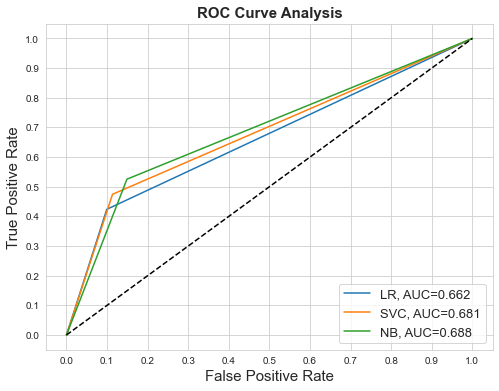

In [170]:
from sklearn.metrics import roc_curve, roc_auc_score

results_table = pd.DataFrame(columns = ['models', 'fpr','tpr','auc'])

predictions = {'LR': y_pred_log, 'SVC': y_pred_svc, 'NB': y_pred_nb}

for key in predictions:
    fpr, tpr, _ = roc_curve(y_test, predictions[key])
    auc = roc_auc_score(y_test, predictions[key])
    
    results_table = results_table.append({'models': key,
                                         'fpr' : fpr,
                                         'tpr' : tpr,
                                         'auc' : auc}, ignore_index=True)
    
results_table.set_index('models', inplace=True)

print(results_table)

fig = plt.figure(figsize = (8,6))

for i in results_table.index:
    plt.plot(results_table.loc[i]['fpr'], 
             results_table.loc[i]['tpr'], 
             label = "{}, AUC={:.3f}".format(i, results_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color = 'black', linestyle = '--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop = {'size':13}, loc = 'lower right')

plt.show()